<a href="https://colab.research.google.com/github/marlanaswann/spr5-kdm1a-conservation-/blob/main/notebooks/03_Sequence_Alignment_of_KDM1A_and_SPR_5_(MAFFT)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install MAFFT + Import Packages

In [36]:
!sudo apt-get install -y mafft
!pip install biopython

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from Bio import SeqIO
from Bio.Align import substitution_matrices
from Bio.Align import AlignInfo
from Bio import AlignIO
from google.colab import files

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mafft is already the newest version (7.490-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


## Upload 2 FASTA Files

In [ ]:
from google.colab import files

print("Upload FASTA file #1")
fasta1 = files.upload()

print("Upload FASTA file #2")
fasta2 = files.upload()

# Print names for confirmation
print("Uploaded files:")
print(list(fasta1.keys()))
print(list(fasta2.keys()))


Upload FASTA file #1


Saving KDM1Afin.fasta to KDM1Afin.fasta
Upload FASTA file #2


Saving SPR5fin.fasta to SPR5fin.fasta
Uploaded files:
['KDM1Afin.fasta']
['SPR5fin.fasta']


## Combine files automatically into one FASTA

In [ ]:
combined_fasta = "combined_sequences.fasta"

with open(combined_fasta, "w") as outfile:
    outfile.write(open('SPR5fin.fasta').read().strip() + "\n")
    outfile.write(open('KDM1Afin.fasta').read().strip() + "\n")

print("Combined FASTA created:", combined_fasta)

#Preview new combined FASTA file
with open(combined_fasta, "r") as infile:
    print(infile.read())


Combined FASTA created: combined_sequences.fasta
>sp|Q9XWP6|KDM1A_CAEEL Lysine-specific histone demethylase 1 OS=Caenorhabditis elegans OX=6239 GN=spr-5 PE=1 SV=1
MSSDTGSEYLDEEIRGDELGPSIDDNALAAAASAARLPFDRPTDHELAFFPELWEHKTAV
EVFLLLRNSTLATWQYNPLKECTALDVRNNVFPPFNSDLDLIQNIVHYLSRHGLINFGRY
VRSTKISRFLVRDRRSVIVIGAGAAGISAATQLESFGFDVIVLEARNCIGGRIHSFKSKS
GEIMETGGDTLRKIEDSPMATLLHQVNFEEHGVFDFTSVFVEGRPLNEEKIHLFLDHYKS
AHGALNYQAHQCEHRDDQGSFISRQQAYENLLSMCERGTLIKYYNFCKSLETVARAREHH
FNQMKQLRMTALMAENQLKKMEEEGNLEQDPVLRRSLKRDIATSLEKFEEVADAFETADN
HWQRLNEHPQAKQYMHPGSEFATFNFMLGFEEYLVGAQLEKVQFSCDSMQNKENGVAARL
TEGIAELLTQLSEKRKLDIRLKHRVLDIDYSGFEHVLLKVQRENGDIEEMKAAFVVSTLP
IGVLKKTIIADERAPTFTPSLPDKKVEAIRNIGCGSVNKCILEFDRVFWTANGGRNQFVT
VSPNIKTRGSMNIWSSVPGSKVLCTYIVGEEAMLELPDDVIIQNAMINLQKAFGNNCPRA
PISAHITRWHDDELAFGSGAFMSLRTETTSFDDVMEPLKTSDGMSRVYFAGEHTCSSYTS
TIQGAWMSGARAAADISNDHIGIGFVDISGTRGQRGDEEEELLIEVDIDGKIPEKDENEA
VADIPNAPNAPNAQKPEEIPKIAEEIELVAEAEKAEKAEVQLEPLVPTVE
>sp|O60341|KDM1A_HUMAN Lysine-specific histone demethy

## Run MAFFT Alignment

In [ ]:
aligned_output = "aligned_spr5_kdm1a.fasta"
!mafft --auto combined_sequences.fasta > {aligned_output}

print("Alignment complete:", aligned_output)

with open(aligned_output) as f:
    print(f.read())


outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.490
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
    0 / 2
done.

Progressive alignment ... 
STEP     1 /1 
done.
tbfast (aa) Version 7.490
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

    0 / 2
Segment   1/  1    1- 931
done
dvtditr (aa) Version 7.490
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 L-INS-i (Probably most accurate, very slow)
 Iterative refinement method (<16) with LOCAL pai

### Confirming the Saved Alignment File

In [37]:
# Print the first few lines of the saved alignment file to confirm
with open(aligned_output, "r") as f:
    for i, line in enumerate(f):
        print(line.strip())
        if i >= 10: # Print first 10 lines to avoid excessive output
            print("... (truncated)")
            break

print(f"\nThe complete alignment is saved as: {aligned_output}")

>sp|Q9XWP6|KDM1A_CAEEL Lysine-specific histone demethylase 1 OS=Caenorhabditis elegans OX=6239 GN=spr-5 PE=1 SV=1
M-----------------------------------------------------------
------------------------------------------------------------
-------SSDTGSEYLDEEIRGDEL------------GPSIDDN--------ALAAAASA
ARLPFDRPTDHELAFFPELWEHKTAVE-VFLLLRNSTLATWQYNPLKECTALDVRNNVFP
PFNSDLDLIQNIVHYLSRHGLINFGRYVRSTKISRFLVRDRRSVIVIGAGAAGISAATQL
ESFGFDVIVLEARNCIGGRIHSFKSKSGEIMETGGDTLRKIEDSPMATLLHQVNFEEHGV
FDFTSVF-VEGRPLNEEKIHLFLDHYKSAHGALNYQAHQCEHRDDQGSFISRQQAYENLL
SMCERGTLIKYYNFCKSLETVARAREHHFNQMKQLRMTALMAENQLKKMEEEGNLEQ--D
PVLRRSLKRDIATSLEKFEEVADAFETADNHWQRLNEHPQAKQYMHPGSEFATFNFMLGF
EEYLVGAQLEKVQFSCDSMQNKENGVAARLTEGIAELLTQLSEKRKLDIRLKHRVLDIDY
... (truncated)

The complete alignment is saved as: aligned_spr5_kdm1a.fasta


### Download the Alignment File

In [39]:
# To download the alignment file to your local computer, uncomment and run the following line:
# from google.colab import files
#files.download(aligned_output)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Visualize Alignment (shaded identity map) + Catalytic Residues

Upload your MAFFT-aligned FASTA file:


Saving aligned_spr5_kdm1a.fasta to aligned_spr5_kdm1a (1).fasta
Alignment length: 930 positions
Aligned position of catalytic Lys661: 670


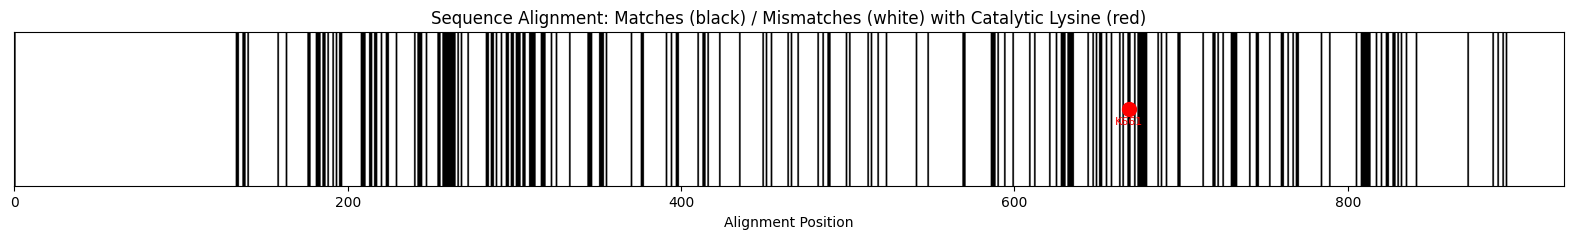

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
# ----------------------------
# 1️⃣ Import libraries
# ----------------------------
import matplotlib.pyplot as plt
from Bio import AlignIO
from google.colab import files

# ----------------------------
# 2️⃣ Upload your MAFFT alignment file
# ----------------------------
print("Upload your MAFFT-aligned FASTA file:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# ----------------------------
# 3️⃣ Read alignment
# ----------------------------
alignment = AlignIO.read(filename, "fasta")
seq1 = alignment[0].seq  # SPR-5
seq2 = alignment[1].seq  # Human KDM1A
alignment_length = alignment.get_alignment_length()
print(f"Alignment length: {alignment_length} positions")

# ----------------------------
# 4️⃣ Map human KDM1A Lys661 to aligned position
# ----------------------------
target_residue_num = 661  # Lys661 in unaligned KDM1A
seq_no_gaps_count = 0
aligned_catalytic_pos = None
for i, aa in enumerate(seq2):
    if aa != '-':
        seq_no_gaps_count += 1
    if seq_no_gaps_count == target_residue_num:
        aligned_catalytic_pos = i + 1  # 1-based
        break

print("Aligned position of catalytic Lys661:", aligned_catalytic_pos)

# ----------------------------
# 5️⃣ Generate match/mismatch plot
# ----------------------------
match_array = [1 if seq1[i] == seq2[i] and seq1[i] != '-' else 0 for i in range(alignment_length)]

plt.figure(figsize=(20, 2))
plt.imshow([match_array], cmap='Greys', aspect='auto')  # black = match, white = mismatch/gap
plt.yticks([])  # hide y-axis
plt.xlabel("Alignment Position")
plt.title("Sequence Alignment: Matches (black) / Mismatches (white) with Catalytic Lysine (red)")

# ----------------------------
# 6️⃣ Add catalytic residue (red dot)
# ----------------------------
if aligned_catalytic_pos:
    plt.scatter(aligned_catalytic_pos-1, 0, color='red', s=100, zorder=5)
    plt.text(aligned_catalytic_pos-1, 0.1, f"K{target_residue_num}", color='red', ha='center', fontsize=8)

# ----------------------------
# 7️⃣ Save the plot
# ----------------------------
output_file = "alignment_catalytic_plot.png"
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()

# ----------------------------
# 8️⃣ Download the saved plot
# ----------------------------
files.download(output_file)


## Compute Percent Identity

In [ ]:
# Read aligned sequences
records = list(SeqIO.parse(aligned_output, "fasta"))
seq1 = np.array(list(str(records[0].seq)))
seq2 = np.array(list(str(records[1].seq)))

matches = (seq1 == seq2) & (seq1 != "-") & (seq2 != "-")
percent_identity = matches.sum() / min(len(seq1[seq1 != "-"]), len(seq2[seq2 != "-"])) * 100

print(f"Percent Identity: {percent_identity:.2f}%")


Percent Identity: 25.58%


In [47]:
!sudo apt-get install -y emboss
!needle -asequence spr5.fasta -bsequence kdm1a.fasta -gapopen 10 -gapextend 0.5 -outfile alignment.needle -aformat pair


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dialign emboss-data emboss-lib libhpdf-2.3.0 primer3
Suggested packages:
  emboss-doc emboss-test embassy clustalw ncbi-epcr
The following NEW packages will be installed:
  dialign emboss emboss-data emboss-lib libhpdf-2.3.0 primer3
0 upgraded, 6 newly installed, 0 to remove and 41 not upgraded.
Need to get 65.7 MB of archives.
After this operation, 500 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 dialign amd64 2.2.1-11 [139 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhpdf-2.3.0 amd64 2.3.0+dfsg-1build1 [335 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 emboss-lib amd64 6.6.0+dfsg-11ubuntu1 [2,971 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 emboss-data all 6.6.0+dfsg-11ubuntu1 [61.0 MB]
Get:5 http://archive.ubuntu.com/ub

## Calculate Overall Percent Similarity

In [51]:
from Bio.Align import substitution_matrices

# Load a substitution matrix (e.g., BLOSUM62)
matrix = substitution_matrices.load("BLOSUM62")

# Re-read aligned sequences (or use existing 'seq1' and 'seq2' if available from previous cell)
# Assuming aligned_output is still defined from earlier cells
records = list(SeqIO.parse(aligned_output, "fasta"))
seq1_arr = np.array(list(str(records[0].seq)))
seq2_arr = np.array(list(str(records[1].seq)))

similar_count = 0
aligned_length_no_gaps = 0

# Iterate through the alignment to count similar residues
for aa1, aa2 in zip(seq1_arr, seq2_arr):
    if aa1 != '-' and aa2 != '-': # Only compare positions where both are actual amino acids
        aligned_length_no_gaps += 1
        try:
            # Get score from substitution matrix
            score = matrix[aa1, aa2]
            if score > 0: # Count as similar if score is positive
                similar_count += 1
        except KeyError: # Handle cases where amino acid pair might not be in matrix (e.g., 'X')
            pass # Or decide how to handle unknown pairs (e.g., treat as not similar)

# Calculate percent similarity over the effective aligned length (where both sequences have residues)
if aligned_length_no_gaps > 0:
    overall_percent_similarity = (similar_count / aligned_length_no_gaps) * 100
else:
    overall_percent_similarity = 0.0

print(f"Overall Percent Similarity (BLOSUM62 > 0): {overall_percent_similarity:.2f}%")


Overall Percent Similarity (BLOSUM62 > 0): 47.83%


## Update Plot with Accurate Overall Similarity

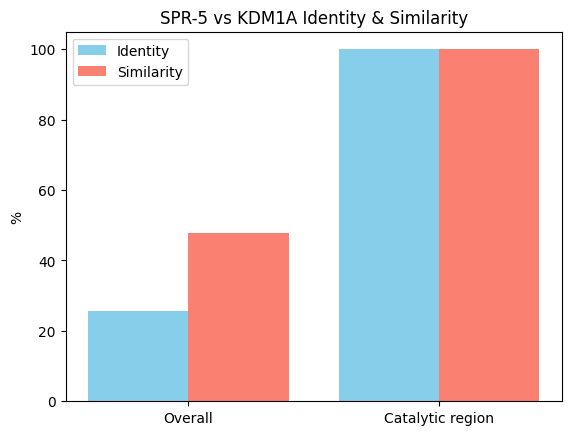

In [52]:
import matplotlib.pyplot as plt

# Calculate catalytic region identity/similarity
# Based on previous analysis, KDM1A Lys661 aligns to SPR-5 Lysine, so it's 100% identical/similar.
# If there were multiple catalytic residues, a more complex calculation would be needed.
pid_catalytic = 100.0
similarity_catalytic = 100.0

regions = ['Overall', 'Catalytic region']
percent_identity = [25.58, pid_catalytic]       # overall, catalytic (25.58 is the value from previous output)
# Use the newly calculated overall_percent_similarity
percent_similarity = [overall_percent_similarity, similarity_catalytic]  # overall, catalytic

x = range(len(regions))
plt.bar(x, percent_identity, width=0.4, label='Identity', color='skyblue')
plt.bar([i+0.4 for i in x], percent_similarity, width=0.4, label='Similarity', color='salmon')
plt.xticks([i+0.2 for i in x], regions)
plt.ylabel('%')
plt.title('SPR-5 vs KDM1A Identity & Similarity')
plt.legend()
plt.show()